In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from utils import get_child_categories_count_by_parent_categories

In [14]:
data = pd.read_csv('../datasets/luxury_apparel_data/Luxury_Products_Apparel_Data.csv')
data = data[['Category', 'SubCategory', 'Description']]
print(f"Num. of obs. where either cat or subcar is None: {data[(data['Category'].isna()) | (data['Category'].isna())].size}")
data = data[(~data['Category'].isna()) & (~data['Category'].isna())]
data['category'] = data['Category'] + 'DELIMITER' + data['SubCategory']
data['description'] = data['Description']
data = data.drop(['Category', 'SubCategory', 'Description'], axis=1)
data['category'] = data['category'].str.split('DELIMITER')

data

Num. of obs. where either cat or subcar is None: 111


,category,description
0,"[Accessories, Bags]","""One of Prada's most functional designs, this ..."
1,"[Accessories, Socks]","""Falke - Casual yet luxurious, Falke's dark na..."
2,"[Suits, Tuxedos]","""White and black linen blend peak lapel tuxedo..."
3,"[Accessories, Gloves]","""Pair of rib knit cashmere gloves in navy. Sig..."
4,"[Accessories, Cufflinks]","""Alice Made This - Made in the UK, these teal ..."
...,...,...
4995,"[Shoes, Sneakers]","""Leather upper. Concealed front lace-up closur..."
4996,"[Jewelry, Watches]","""Swiss-made PVD-coated stainless steel two-han..."
4997,"[Accessories, Belts]","""Bordeaux red leather two tone braces from Fef..."
4998,"[Activewear, Active Pants]","""Valentino - Crafted in lightweight virgin-woo..."


In [15]:
data['description'].isna().sum(), data['category'].isna().sum()

(0, 0)

In [16]:
data['category_count'] = data['category'].str.len()

set([i for x in data[data['category_count'] == 1]['category'].values for i in x])

set()

In [17]:
categories_count = Counter({})

for x in data['category']:
    categories_count += Counter(x)

In [18]:
all_unique_categories = list(set([k for x in data['category'] for k in x]))

len(all_unique_categories)

47

In [19]:
all_unique_categories

['Activewear',
 'Accessories',
 'Suits',
 'Tuxedos',
 'Tech Accessories',
 'Pocket Squares',
 'Sweatshirts/Hoodies',
 'Polos',
 'Overshirts',
 'Watches',
 'Coats',
 'Ties',
 'Shirts',
 'Gloves',
 'Wallets',
 'Scarves',
 'Denim',
 'Boxers & Briefs',
 'Socks',
 'Pants',
 'Belts',
 'Shorts',
 'Sandals',
 'Slides/Slipper',
 'Jewelry',
 'Jackets',
 'Loafers',
 'Jackets/Coats',
 'Pins and Clips',
 'Boots',
 'Bags',
 'Eyewear',
 'Vests',
 'Cardigans',
 'Hats',
 'Underwear and Nightwear',
 'Robes',
 'Sneakers',
 'Derbys',
 'Chinos',
 'Sweaters',
 'T-Shirts',
 'Cufflinks',
 'Loungewear',
 'Active Pants',
 'Shoes',
 'Oxfords']

In [20]:
parent_unique_categories = list(set([x[0] for x in data['category']]))

parent_unique_categories

['Activewear',
 'Accessories',
 'Suits',
 'Pants',
 'Sweaters',
 'Shirts',
 'Jewelry',
 'Shoes',
 'Underwear and Nightwear',
 'Jackets/Coats']

In [21]:
len(parent_unique_categories)

10

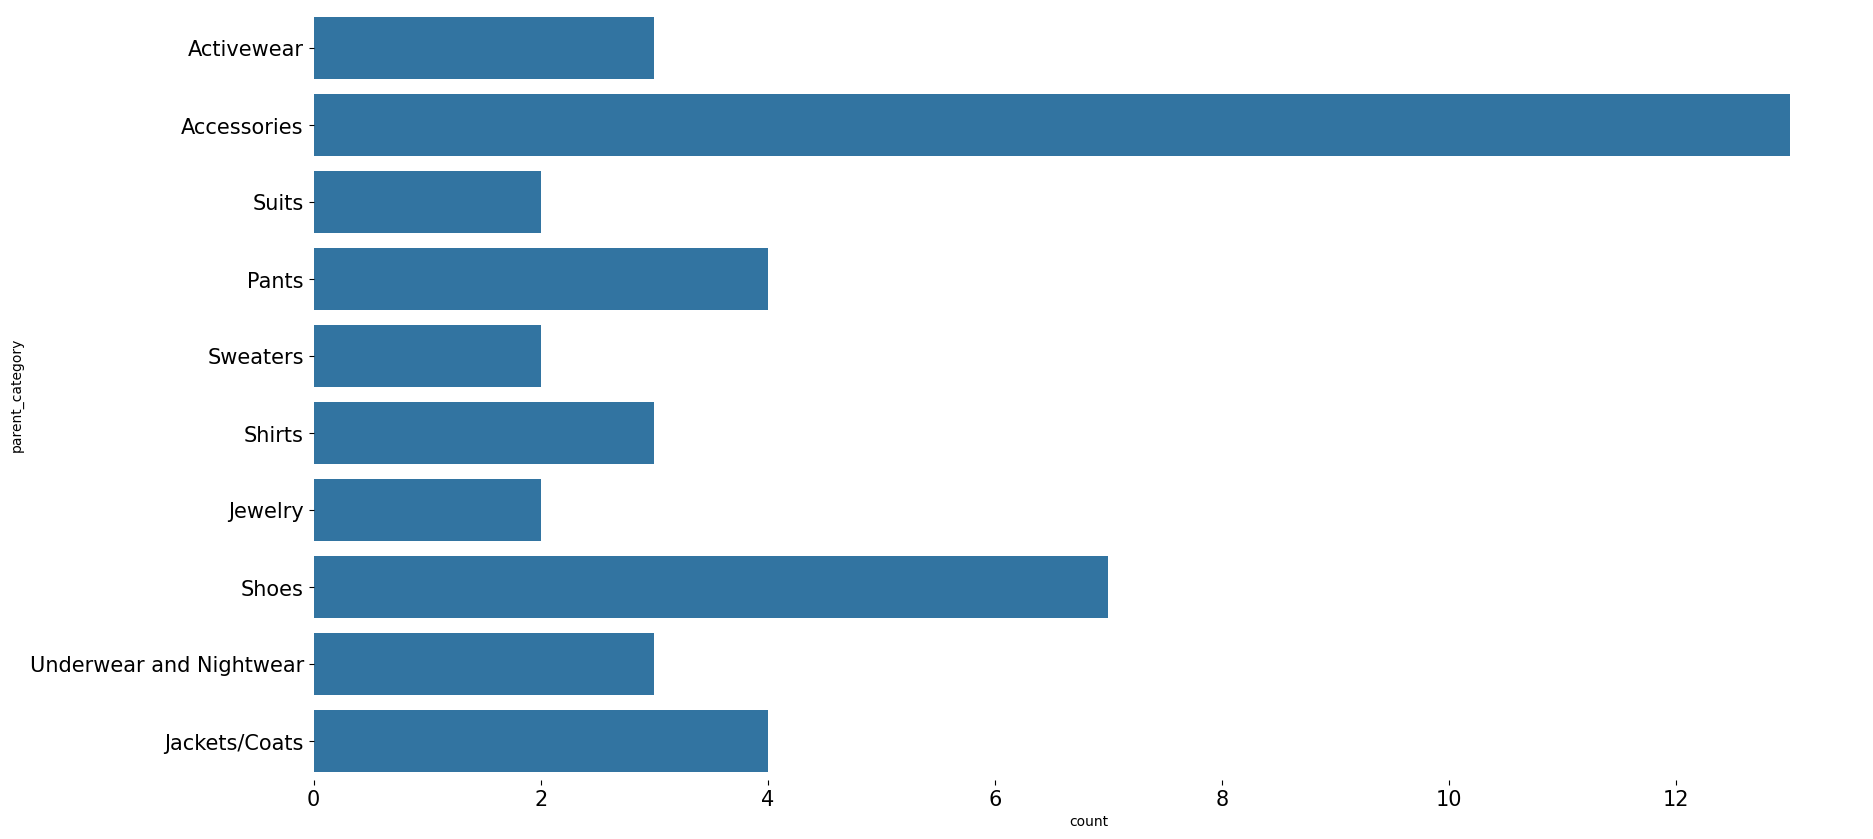

In [22]:
categories_counts = get_child_categories_count_by_parent_categories(data)

keys = categories_counts['parent_category']
# get values in the same order as keys, and parse percentage values
vals = categories_counts['count']

plt.figure(figsize=(20, 10))
ax = sns.barplot(x=vals, y=keys)
ax.tick_params(labelsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

In [23]:
categories_counts

,parent_category,count
0,Activewear,3
1,Accessories,13
2,Suits,2
3,Pants,4
4,Sweaters,2
5,Shirts,3
6,Jewelry,2
7,Shoes,7
8,Underwear and Nightwear,3
9,Jackets/Coats,4


/tmp/ipykernel_24761/708169020.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data["description"].apply(count_words))


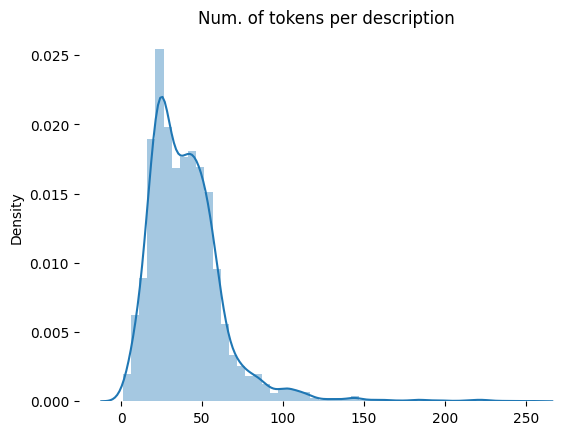

In [24]:
def count_words(x):
    return len(x.split())

ax = sns.distplot(data["description"].apply(count_words))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.title("Num. of tokens per description")
plt.xlabel("")
plt.show()

In [127]:
data["description"].apply(count_words).describe()

count    4963.000000
mean       40.408019
std        24.334623
min         1.000000
25%        24.000000
50%        37.000000
75%        51.000000
max       253.000000
Name: description, dtype: float64

In [128]:
data = data[(data['description'].str.split().str.len() > 10) & (data['description'].str.split().str.len() <= 130)]

In [131]:
data.shape

(4754, 3)

In [132]:
data.columns

Index(['category', 'description', 'category_count'], dtype='object')

In [133]:
data = data.reset_index()
data = data.drop(['index'], axis=1)

In [134]:
data['parent_category'] = data['category'].apply(lambda x: x[0])

data

,category,description,category_count,parent_category
0,"[Accessories, Bags]","""One of Prada's most functional designs, this ...",2,Accessories
1,"[Accessories, Socks]","""Falke - Casual yet luxurious, Falke's dark na...",2,Accessories
2,"[Suits, Tuxedos]","""White and black linen blend peak lapel tuxedo...",2,Suits
3,"[Accessories, Gloves]","""Pair of rib knit cashmere gloves in navy. Sig...",2,Accessories
4,"[Accessories, Cufflinks]","""Alice Made This - Made in the UK, these teal ...",2,Accessories
...,...,...,...,...
4749,"[Shoes, Sneakers]","""Leather upper. Concealed front lace-up closur...",2,Shoes
4750,"[Jewelry, Watches]","""Swiss-made PVD-coated stainless steel two-han...",2,Jewelry
4751,"[Accessories, Belts]","""Bordeaux red leather two tone braces from Fef...",2,Accessories
4752,"[Activewear, Active Pants]","""Valentino - Crafted in lightweight virgin-woo...",2,Activewear


In [135]:
data.groupby(['parent_category']).apply(lambda x: x['description'].str.split().str.len().mean())

/tmp/ipykernel_26536/1204828366.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data.groupby(['parent_category']).apply(lambda x: x['description'].str.split().str.len().mean())


parent_category
Accessories                39.094449
Activewear                 38.741996
Jackets/Coats              44.420712
Jewelry                    58.873418
Pants                      42.227898
Shirts                     35.849365
Shoes                      40.042424
Suits                      52.349206
Sweaters                   35.218978
Underwear and Nightwear    34.563492
dtype: float64

/tmp/ipykernel_26536/3968563391.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  keys = list(data.groupby(['parent_category']).apply(lambda x: x['description'].str.split().str.len().mean()).keys())
/tmp/ipykernel_26536/3968563391.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  vals = [data.groupby(['parent_category']).apply(lambda x: x['description'].str.split().str.len().mean())[k] for k in keys]
/t

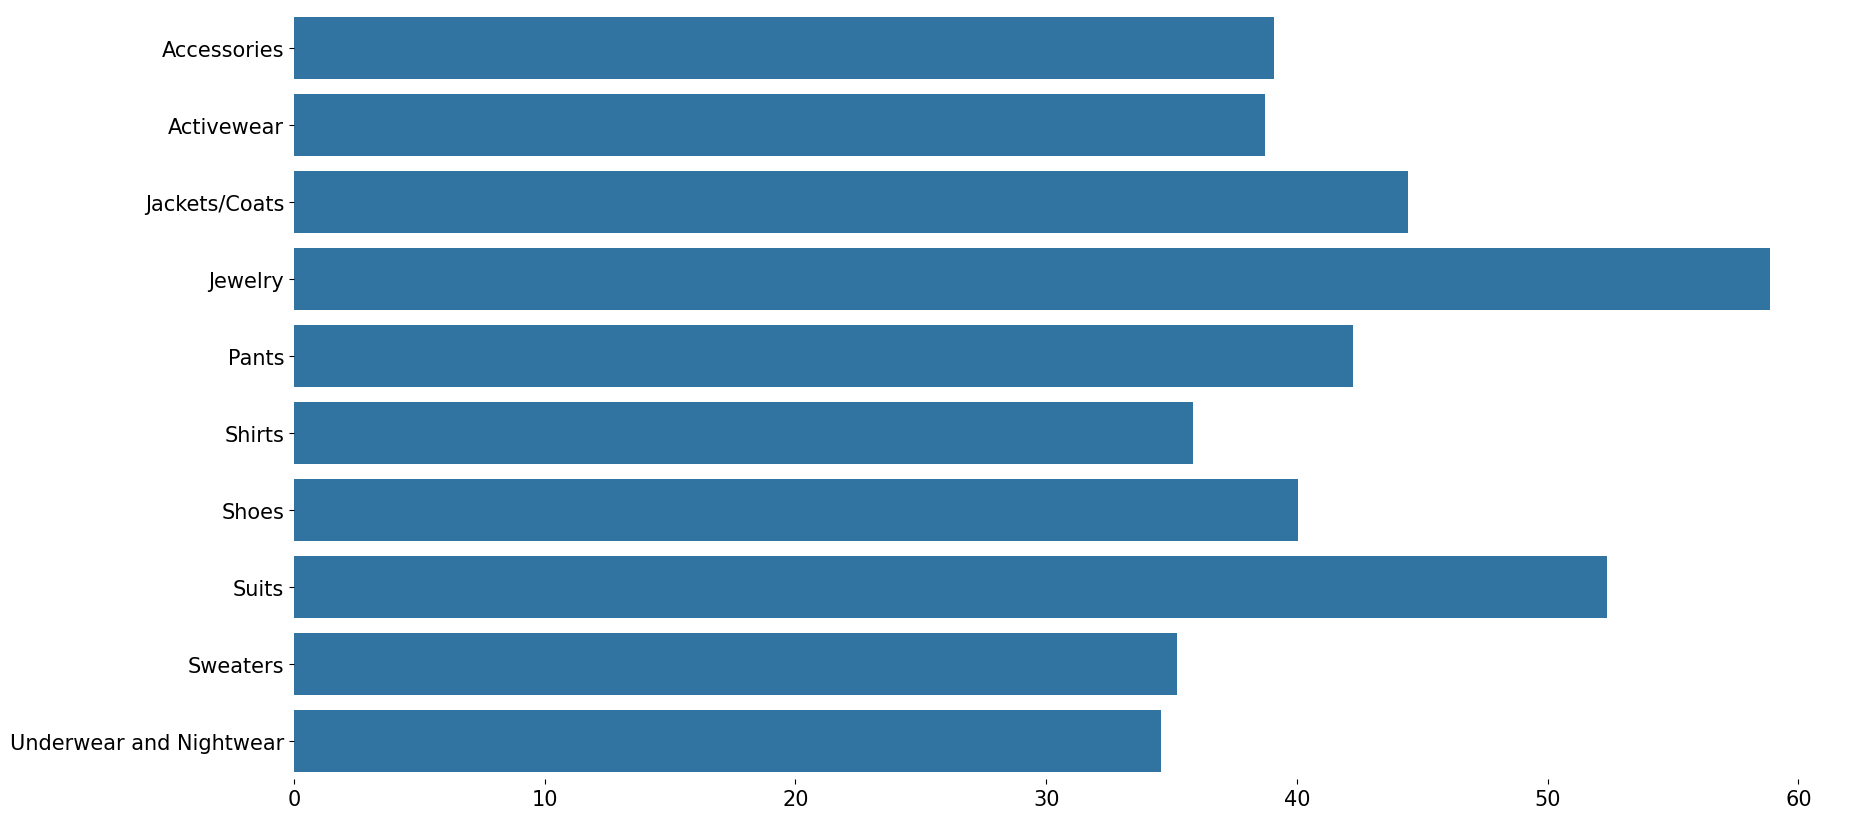

In [136]:
keys = list(data.groupby(['parent_category']).apply(lambda x: x['description'].str.split().str.len().mean()).keys())
# get values in the same order as keys, and parse percentage values
vals = [data.groupby(['parent_category']).apply(lambda x: x['description'].str.split().str.len().mean())[k] for k in keys]

plt.figure(figsize=(20, 10))
ax = sns.barplot(x=vals, y=keys)
ax.tick_params(labelsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.show()

In [137]:
import statistics

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

def confidence_interval(data, confidence=0.95):
  dist = statistics.NormalDist.from_samples(data)
  z = statistics.NormalDist().inv_cdf((1 + confidence) / 2.)
  h = dist.stdev * z / ((len(data) - 1) ** .5)
  return dist.mean - h, dist.mean + h

# confidence_interval(data['description'].str.split().apply(lambda tokens: np.mean([len(token) for token in tokens])))
a = data['description'].str.split().apply(lambda tokens: np.mean([len(token) for token in tokens]))
scipy.stats.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=scipy.stats.sem(a))

(5.5897728464182395, 5.622895397098126)

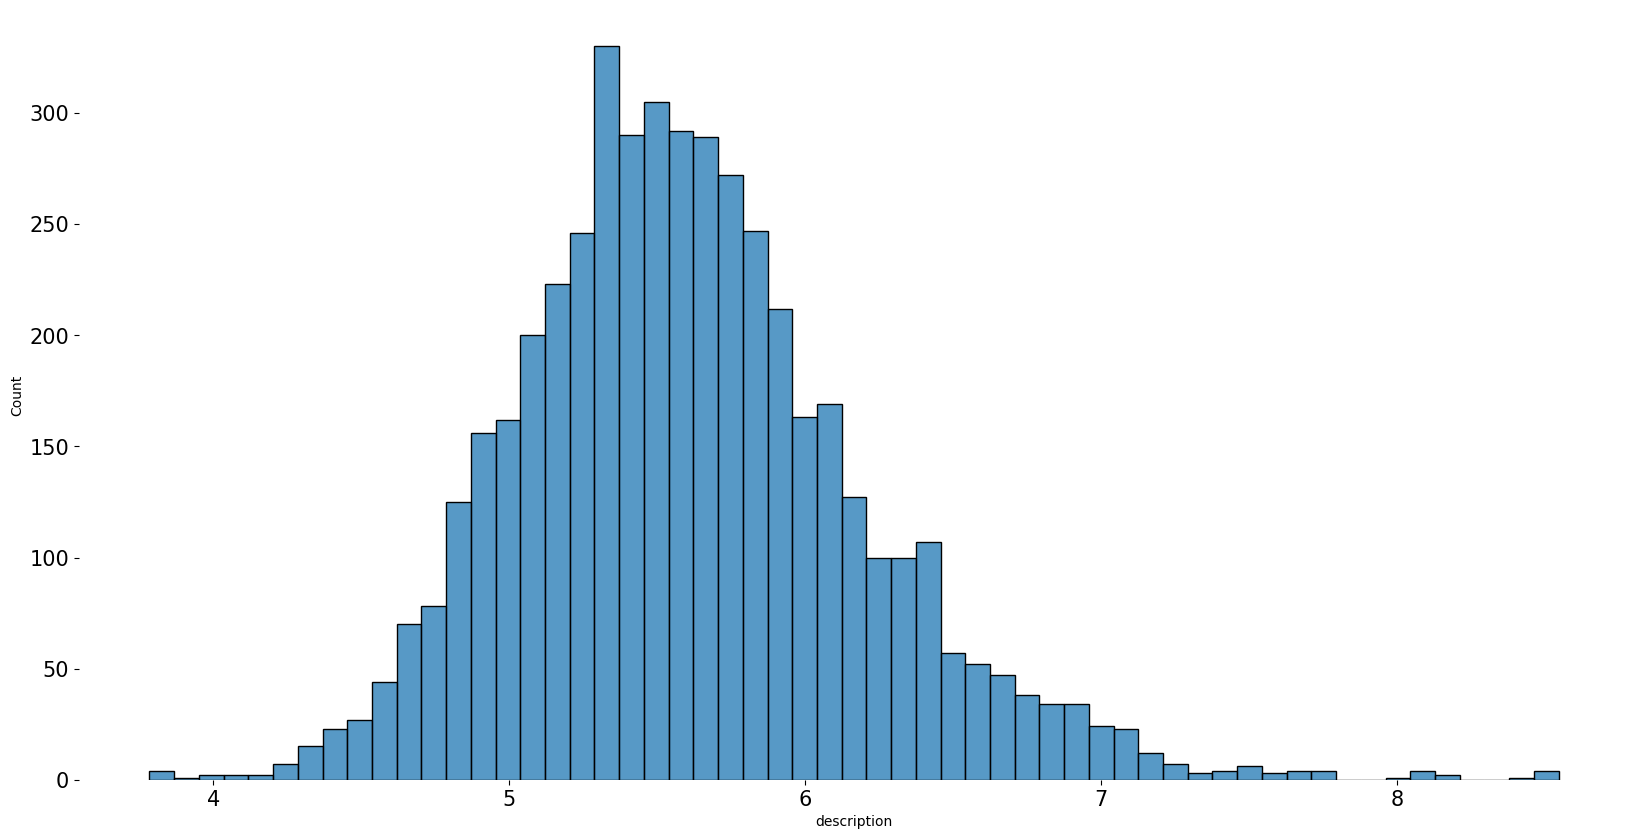

In [138]:
plt.figure(figsize=(20, 10))
ax = sns.histplot(data['description'].str.split().apply(lambda tokens: np.mean([len(token) for token in tokens])))
ax.tick_params(labelsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.show()

In [140]:
data['description'].str.split().apply(lambda tokens: np.mean([len(token) for token in tokens])).describe()

count    4754.000000
mean        5.606334
std         0.582458
min         3.783784
25%         5.222222
50%         5.555556
75%         5.931034
max         8.545455
Name: description, dtype: float64

In [141]:
chars_count_per_parent_category = data.groupby(['parent_category']) \
    .apply(lambda row: row['description'].str.split().values) \
    .apply(lambda x: np.mean([len(j) for i in x for j in i]))


chars_count_per_parent_category

/tmp/ipykernel_26536/1600729232.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda row: row['description'].str.split().values) \


parent_category
Accessories                5.537182
Activewear                 5.727105
Jackets/Coats              5.374108
Jewelry                    5.742851
Pants                      5.537034
Shirts                     5.521592
Shoes                      5.422960
Suits                      5.703356
Sweaters                   5.415130
Underwear and Nightwear    5.534328
dtype: float64

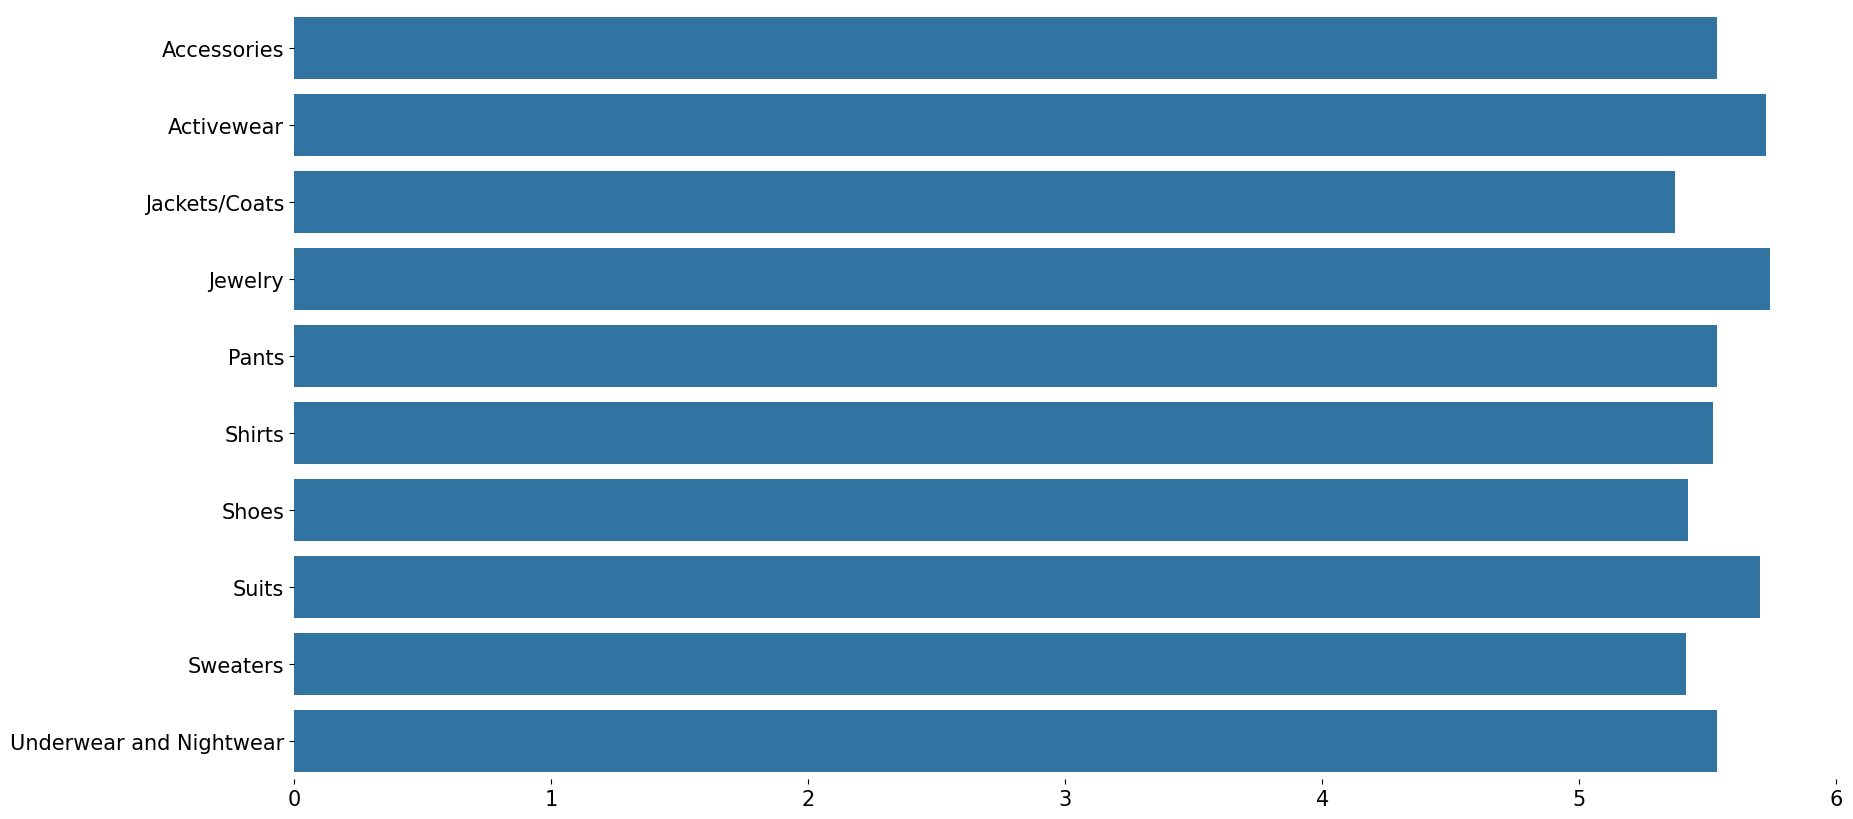

In [143]:
keys = list(chars_count_per_parent_category.keys())
# get values in the same order as keys, and parse percentage values
vals = list(chars_count_per_parent_category.values)

plt.figure(figsize=(20, 10))
ax = sns.barplot(x=vals, y=keys)
ax.tick_params(labelsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.show()

In [144]:
words_counter = Counter()

for tokens in data['description'].str.split():
    words_counter += Counter(tokens)

words_counter_x, words_counter_y= [], []

for word,count in words_counter.most_common(15):
    words_counter_x.append(word)
    words_counter_y.append(count)

In [145]:
words_counter.most_common(15)

[('a', 5035),
 ('and', 4989),
 ('in', 4667),
 ('with', 3814),
 ('the', 3360),
 ('-', 2549),
 ('to', 1997),
 ('from', 1834),
 ('at', 1746),
 ('of', 1517),
 ('\\u003e', 1424),
 ('for', 1192),
 ('logo', 1096),
 ('Made', 1049),
 ('is', 968)]

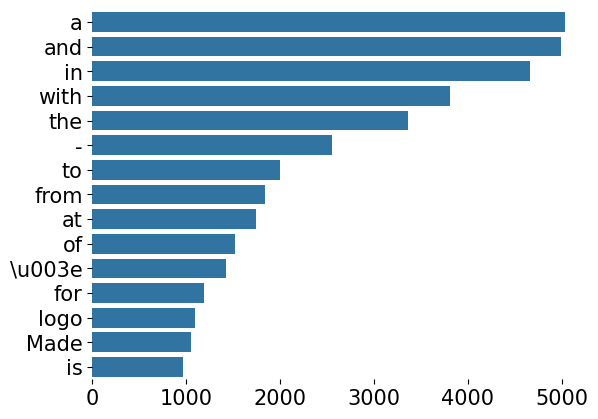

In [146]:
ax = sns.barplot(x=words_counter_y, y=words_counter_x)
ax.tick_params(labelsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.show()

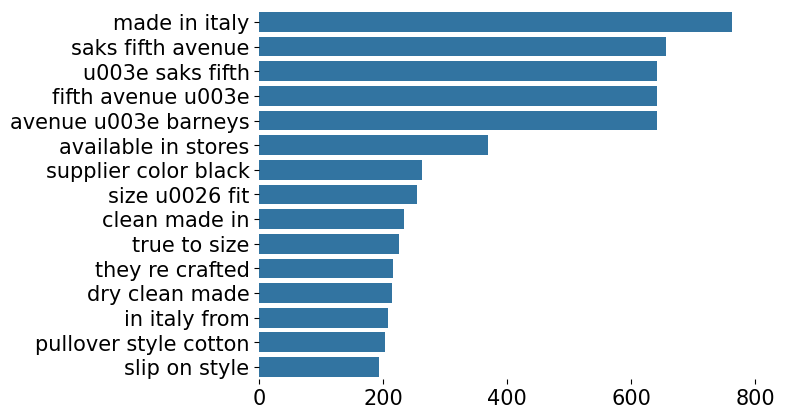

In [149]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:15]

top_n_bigrams=get_top_ngram(data['description'], 3)[:15]
x,y=map(list,zip(*top_n_bigrams))
ax = sns.barplot(x=y,y=x)
ax.tick_params(labelsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.show()

In [150]:
top_n_bigrams

[('made in italy', 762),
 ('saks fifth avenue', 656),
 ('u003e saks fifth', 641),
 ('fifth avenue u003e', 641),
 ('avenue u003e barneys', 641),
 ('available in stores', 369),
 ('supplier color black', 263),
 ('size u0026 fit', 255),
 ('clean made in', 233),
 ('true to size', 226),
 ('they re crafted', 215),
 ('dry clean made', 214),
 ('in italy from', 208),
 ('pullover style cotton', 203),
 ('slip on style', 193)]